<a href="https://colab.research.google.com/github/radhika1112/Real-time-COVID-19-analysis/blob/master/COVID_19_Analysis_on_real_time_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## USING COVID-19 REAL TIME DATA FROM THE CORONA VIRUS TRACKER API 
https://coronavirus-tracker-api.herokuapp.com/all 

Date: 14 March 2020 5:16pm IST

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [0]:
api_url='https://coronavirus-tracker-api.herokuapp.com/all'

In [0]:
json_data=pd.read_json(api_url)

In [6]:
json_data.keys()

Index(['confirmed', 'deaths', 'latest', 'recovered'], dtype='object')

In [0]:
confirmed_data=json_data['confirmed']

In [36]:
deaths_data=json_data['deaths']
deaths_data

last_updated                          2020-03-14T11:37:12.360755Z
latest                                                       5404
locations       [{'coordinates': {'lat': '15', 'long': '101'},...
source          https://github.com/ExpDev07/coronavirus-tracke...
confirmed                                                     NaN
deaths                                                        NaN
recovered                                                     NaN
Name: deaths, dtype: object

In [37]:
latest_data=json_data['latest']
latest_data

last_updated         NaN
latest               NaN
locations            NaN
source               NaN
confirmed       145193.0
deaths            5404.0
recovered        70251.0
Name: latest, dtype: float64

In [39]:
recovered_data=json_data['recovered']
recovered_data

last_updated                          2020-03-14T11:37:16.270369Z
latest                                                      70251
locations       [{'coordinates': {'lat': '15', 'long': '101'},...
source          https://github.com/ExpDev07/coronavirus-tracke...
confirmed                                                     NaN
deaths                                                        NaN
recovered                                                     NaN
Name: recovered, dtype: object

In [0]:
deaths_locs=deaths_data['locations']

In [0]:
confirmed_locs=confirmed_data['locations']

In [0]:
recovered_locs=recovered_data['locations']

In [0]:
from pandas.io.json import json_normalize

confirmed_df = pd.DataFrame.from_dict(json_normalize(confirmed_locs), orient='columns')
deaths_df=pd.DataFrame.from_dict(json_normalize(deaths_locs), orient='columns')
recovered_df=pd.DataFrame.from_dict(json_normalize(recovered_locs), orient='columns')

In [81]:
recovered_df.drop(['country_code','province',	'coordinates.lat',	'coordinates.long'], axis=1, inplace=True)
recovered_df

,country,latest,history.1/22/20,history.1/23/20,history.1/24/20,history.1/25/20,history.1/26/20,history.1/27/20,history.1/28/20,history.1/29/20,history.1/30/20,history.1/31/20,history.2/1/20,history.2/10/20,history.2/11/20,history.2/12/20,history.2/13/20,history.2/14/20,history.2/15/20,history.2/16/20,history.2/17/20,history.2/18/20,history.2/19/20,history.2/2/20,history.2/20/20,history.2/21/20,history.2/22/20,history.2/23/20,history.2/24/20,history.2/25/20,history.2/26/20,history.2/27/20,history.2/28/20,history.2/29/20,history.2/3/20,history.2/4/20,history.2/5/20,history.2/6/20,history.2/7/20,history.2/8/20,history.2/9/20,history.3/1/20,history.3/10/20,history.3/11/20,history.3/12/20,history.3/13/20,history.3/2/20,history.3/3/20,history.3/4/20,history.3/5/20,history.3/6/20,history.3/7/20,history.3/8/20,history.3/9/20
0,Thailand,35,0,0,0,0,2,2,5,5,5,5,5,10,10,10,12,12,12,14,15,15,15,5,15,17,17,21,21,22,22,22,28,28,5,5,5,5,5,10,10,28,33,34,34,35,31,31,31,31,31,31,31,31
1,Japan,118,0,0,0,0,1,1,1,1,1,1,1,4,9,9,9,9,12,12,12,13,18,1,18,22,22,22,22,22,22,22,22,32,1,1,1,1,1,1,1,32,101,118,118,118,32,43,43,43,46,76,76,76
2,Singapore,97,0,0,0,0,0,0,0,0,0,0,0,2,9,15,15,17,18,18,24,29,34,0,34,37,37,51,51,53,62,62,62,72,0,0,0,0,0,2,2,72,78,96,96,97,78,78,78,78,78,78,78,78
3,Nepal,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Malaysia,26,0,0,0,0,0,0,0,0,0,0,0,1,3,3,3,3,7,7,7,13,15,0,15,15,15,15,18,18,18,18,18,18,0,0,0,0,1,1,1,18,24,26,26,26,18,22,22,22,22,23,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,Guinea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
417,Aruba,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
418,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
419,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
recovered_df.columns = recovered_df.columns.str.lstrip('history.')

In [0]:
# recovered_df1=recovered_df.melt(id_vars=["country", "latest"], 
#         var_name="Date", 
#         value_name="Value")

recovered_df1 = (recovered_df.set_index(["country", "latest"])
         .stack()
         .reset_index(name='Value')
         .rename(columns={'level_2':'Date'}))

In [87]:
recovered_df1

,country,latest,Date,Value
0,Thailand,35,1/22/20,0
1,Thailand,35,1/23/20,0
2,Thailand,35,1/24/20,0
3,Thailand,35,1/25/20,0
4,Thailand,35,1/26/20,2
...,...,...,...,...
21887,US,0,3/5/20,0
21888,US,0,3/6/20,0
21889,US,0,3/7/20,0
21890,US,0,3/8/20,0


In [0]:
india_recovery=recovered_df1[recovered_df1['country']=='India']

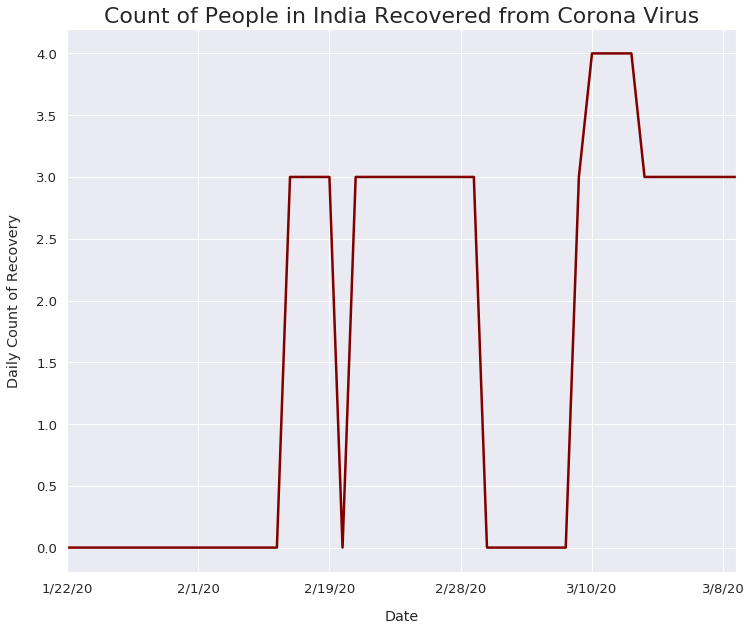

In [103]:
import seaborn as sns; 
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)
india_recovery.set_index('Date')['Value'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Count of Recovery", labelpad=15)
plt.title("Count of People in India Recovered from Corona Virus", y=1.0, fontsize=22);

In [44]:
deaths_df[deaths_df['country']=='India']

,country,country_code,latest,province,coordinates.lat,coordinates.long,history.1/22/20,history.1/23/20,history.1/24/20,history.1/25/20,history.1/26/20,history.1/27/20,history.1/28/20,history.1/29/20,history.1/30/20,history.1/31/20,history.2/1/20,history.2/10/20,history.2/11/20,history.2/12/20,history.2/13/20,history.2/14/20,history.2/15/20,history.2/16/20,history.2/17/20,history.2/18/20,history.2/19/20,history.2/2/20,history.2/20/20,history.2/21/20,history.2/22/20,history.2/23/20,history.2/24/20,history.2/25/20,history.2/26/20,history.2/27/20,history.2/28/20,history.2/29/20,history.2/3/20,history.2/4/20,history.2/5/20,history.2/6/20,history.2/7/20,history.2/8/20,history.2/9/20,history.3/1/20,history.3/10/20,history.3/11/20,history.3/12/20,history.3/13/20,history.3/2/20,history.3/3/20,history.3/4/20,history.3/5/20,history.3/6/20,history.3/7/20,history.3/8/20,history.3/9/20
15,India,IN,2,,21,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0


In [45]:
confirmed_df[confirmed_df['country']=='India']

,country,country_code,latest,province,coordinates.lat,coordinates.long,history.1/22/20,history.1/23/20,history.1/24/20,history.1/25/20,history.1/26/20,history.1/27/20,history.1/28/20,history.1/29/20,history.1/30/20,history.1/31/20,history.2/1/20,history.2/10/20,history.2/11/20,history.2/12/20,history.2/13/20,history.2/14/20,history.2/15/20,history.2/16/20,history.2/17/20,history.2/18/20,history.2/19/20,history.2/2/20,history.2/20/20,history.2/21/20,history.2/22/20,history.2/23/20,history.2/24/20,history.2/25/20,history.2/26/20,history.2/27/20,history.2/28/20,history.2/29/20,history.2/3/20,history.2/4/20,history.2/5/20,history.2/6/20,history.2/7/20,history.2/8/20,history.2/9/20,history.3/1/20,history.3/10/20,history.3/11/20,history.3/12/20,history.3/13/20,history.3/2/20,history.3/3/20,history.3/4/20,history.3/5/20,history.3/6/20,history.3/7/20,history.3/8/20,history.3/9/20
15,India,IN,82,,21,78,0,0,0,0,0,0,0,0,1,1,1,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,56,62,73,82,5,5,28,30,31,34,39,43


In [47]:
ax = sns.lineplot(x="confirmed_df[:,6:]", y="signal", hue="event",
                  units="subject", estimator=None, lw=1,
                  data=confirmed_df.query("country == 'India'"))

ValueError: ignored